In [ ]:
!wget http://data.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv

--2022-09-18 13:12:39--  http://data.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv
Resolving data.covid19india.org (data.covid19india.org)... 185.199.110.153, 185.199.108.153, 185.199.111.153, ...
Connecting to data.covid19india.org (data.covid19india.org)|185.199.110.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://data.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv [following]
--2022-09-18 13:12:39--  https://data.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv
Connecting to data.covid19india.org (data.covid19india.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1255641 (1.2M) [text/csv]
Saving to: ‘cowin_vaccine_data_statewise.csv’

cowin_vaccine_data_ 100%[===================>]   1.20M  --.-KB/s    in 0.09s   

2022-09-18 13:12:39 (14.0 MB/s) - ‘cowin_vaccine_data_statewise.csv’ saved [1255641/1255641]



In [ ]:
!wget https://data.covid19india.org/csv/latest/statewise_tested_numbers_data.csv

--2022-09-18 13:11:35--  https://data.covid19india.org/csv/latest/statewise_tested_numbers_data.csv
Resolving data.covid19india.org (data.covid19india.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to data.covid19india.org (data.covid19india.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4026348 (3.8M) [text/csv]
Saving to: ‘statewise_tested_numbers_data.csv’

statewise_tested_nu 100%[===================>]   3.84M  --.-KB/s    in 0.09s   

2022-09-18 13:11:36 (44.4 MB/s) - ‘statewise_tested_numbers_data.csv’ saved [4026348/4026348]



In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore")

In [ ]:
state = "Maharashtra"

In [ ]:
all_state_mobility_zip = ZipFile("/content/drive/MyDrive/mobility_covid/mobility.zip")
state_mobility_df = pd.read_csv(all_state_mobility_zip.open("content/{}.csv".format(state)))
covid_cases = pd.read_csv("/content/drive/MyDrive/mobility_covid/phased_districts.csv")

In [ ]:
state_mobility_df.head()

,Unnamed: 0,GEOMETRY,date_time,start_polygon_id,start_polygon_name,end_polygon_id,end_polygon_name,length_km,tile_size,country,level,n_crisis,n_baseline,n_difference,percent_change,is_statistically_significant,z_score,start_lat,start_lon,end_lat,end_lon,geometry,State
0,0,"LINESTRING (80.52978515625 22.101924376207542,...",2020-08-30 16:00,1102461,Paraswada,1102460,Baihar,4.578168,13,IN,LEVEL4,22.0,35.75,-13.75,-37.414966,0.0,-1.201725,22.089361,80.402657,22.002943,80.731063,NaN,Maharashtra
1,1,"LINESTRING (77.98095703125 18.417077395751605,...",2020-08-30 16:00,1104405,Banswada,1104398,Varni,6.555819,13,IN,LEVEL4,NaN,NaN,NaN,400.000000,0.0,4.000000,18.382414,77.919556,18.528101,77.946995,NaN,Maharashtra
2,2,LINESTRING (76.00708741702154 19.4843208207550...,2020-08-30 16:00,1102945,Ghansawangi,1102945,Ghansawangi,0.090504,13,IN,LEVEL4,1499.0,1598.25,-99.25,-6.206034,0.0,-0.432451,19.498021,76.016638,19.498021,76.016638,NaN,Maharashtra
3,3,LINESTRING (78.11104679739239 19.1571242943060...,2020-08-30 16:00,1104359,Kuntala,1104359,Kuntala,0.000000,13,IN,LEVEL4,150.0,163.00,-13.00,-7.926829,0.0,-0.448365,19.175914,78.111535,19.175914,78.111535,NaN,Maharashtra
4,4,LINESTRING (79.0938774822968 16.68886151877614...,2020-08-30 16:00,1104680,Pedda Adiserla Palle,1104680,Pedda Adiserla Palle,0.036466,13,IN,LEVEL4,408.0,382.00,26.00,6.788512,0.0,0.152242,16.682557,79.111187,16.682557,79.111187,NaN,Maharashtra


In [ ]:
covid_cases["date"] = pd.to_datetime(covid_cases["Date"])
state_mobility_df['date_time'] = pd.to_datetime(state_mobility_df['date_time'])
state_mobility_df['date'] = pd.to_datetime(state_mobility_df['date_time'].dt.date)

In [ ]:
working_data = state_mobility_df.groupby('date',as_index = False)['n_crisis','n_baseline'].sum()
working_data['length_km'],working_data['percent_change'],working_data['z_score'] = state_mobility_df.groupby('date',as_index = False)['length_km','percent_change','z_score'].mean()['length_km'],state_mobility_df.groupby('date',as_index = False)['length_km','percent_change','z_score'].mean()['percent_change'],state_mobility_df.groupby('date',as_index = False)['length_km','percent_change','z_score'].mean()['z_score']
working_data

,date,n_crisis,n_baseline,length_km,percent_change,z_score
0,2020-08-13,14115137.0,16043302.40,27.232847,39.883342,0.221992
1,2020-08-14,14081415.0,16024954.60,27.251162,40.915116,0.263081
2,2020-08-15,14248579.0,15975865.40,26.823139,28.455087,0.062444
3,2020-08-16,14164612.0,16028696.50,25.947957,38.790101,0.226317
4,2020-08-17,14097280.0,15989134.80,27.886973,36.073089,0.230496
...,...,...,...,...,...,...
439,2021-10-27,10360228.0,16079827.40,39.884211,14.370152,-0.426007
440,2021-10-28,10325064.0,16039904.00,40.402150,10.495976,-0.484494
441,2021-10-29,10281680.0,16016420.00,39.265684,9.992216,-0.514630
442,2021-10-30,10218258.0,15993569.60,43.206157,18.321979,-0.393032


In [ ]:
covid_working_1 = covid_cases[covid_cases["State"]==state].groupby(["date"],as_index=False)["Confirmed"].sum()
covid_working_1['Daily'] = covid_working_1['Confirmed'].diff()
# covid_working_1["Daily"] = covid_working_1[["date","Confirmed"]].diff()["Confirmed"]
# covid_working_1['date'] = covid_working_1['Date']
covid_working_1 = covid_working_1[covid_working_1['date']>="2020-08-13"]
covid_working_1

,date,Confirmed,Daily
109,2020-08-13,560126,11813.0
110,2020-08-14,572734,12608.0
111,2020-08-15,584754,12020.0
112,2020-08-16,595865,11111.0
113,2020-08-17,604358,8493.0
...,...,...,...
549,2021-10-27,6606536,1485.0
550,2021-10-28,6607954,1418.0
551,2021-10-29,6609292,1338.0
552,2021-10-30,6609906,614.0


In [ ]:
vac = pd.read_csv('/content/cowin_vaccine_data_statewise.csv')
vac = vac[vac['State'] == state].reset_index(drop = True)
vac = vac[['Updated On','Total Doses Administered', 'First Dose Administered','Second Dose Administered','Covaxin (Doses Administered)','CoviShield (Doses Administered)','Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)']].fillna(0)
vac['Updated On'] = pd.to_datetime(vac['Updated On'])
vac[['Total Doses Administered', 'First Dose Administered','Second Dose Administered','Covaxin (Doses Administered)','CoviShield (Doses Administered)','Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)']] = vac[['Total Doses Administered', 'First Dose Administered','Second Dose Administered','Covaxin (Doses Administered)','CoviShield (Doses Administered)','Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)']].diff().abs().fillna(0)
vac

,Updated On,Total Doses Administered,First Dose Administered,Second Dose Administered,Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered)
0,2021-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-17,795.0,795.0,0.0,9.0,786.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-18,370.0,370.0,0.0,11.0,381.0,0.0,0.0,0.0,0.0,0.0
3,2021-01-19,7548.0,7548.0,0.0,109.0,7439.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-20,10181.0,10181.0,0.0,225.0,9956.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
284,2021-10-27,457813.0,261672.0,196141.0,59164.0,397989.0,660.0,2.0,326954.0,77007.0,53852.0
285,2021-10-28,464549.0,260899.0,203650.0,61200.0,402638.0,711.0,0.0,333700.0,77105.0,53744.0
286,2021-10-29,451033.0,251212.0,199821.0,58654.0,391718.0,661.0,7.0,324688.0,75040.0,51305.0
287,2021-10-30,430507.0,236912.0,193595.0,51795.0,377641.0,1071.0,0.0,312685.0,70487.0,47335.0


In [ ]:
tests = pd.read_csv('/content/statewise_tested_numbers_data.csv')
tests = tests[tests['State'] == state].reset_index(drop = True)
tests = tests[['Updated On','Total Tested']].fillna(0)
tests['Updated On'] = pd.to_datetime(tests['Updated On'])
tests['Total Tested'] = tests['Total Tested'].diff().fillna(0)
tests

,Updated On,Total Tested
0,2020-05-04,0.0
1,2020-06-04,1555.0
2,2020-07-04,3314.0
3,2020-09-04,0.0
4,2020-10-04,9123.0
...,...,...
566,2021-10-27,122608.0
567,2021-10-28,114099.0
568,2021-10-29,122990.0
569,2021-10-30,119271.0


In [ ]:
working_data = pd.merge(left = working_data, right = vac, left_on="date", right_on = 'Updated On', how='left')
working_data = pd.merge(left = working_data, right = tests, left_on="date", right_on = 'Updated On', how='left')
working_data = pd.merge(left = working_data, right = covid_working_1[['date','Daily']], on="date", how='left')
working_data["Daily"] = working_data['Daily'].rolling(window=7).mean()
working_data

,date,n_crisis,n_baseline,length_km,percent_change,z_score,Updated On_x,Total Doses Administered,First Dose Administered,Second Dose Administered,Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),Updated On_y,Total Tested,Daily
0,2020-08-13,14115137.0,16043302.40,27.232847,39.883342,0.221992,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-13,67391.0,NaN
1,2020-08-14,14081415.0,16024954.60,27.251162,40.915116,0.263081,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-14,68391.0,NaN
2,2020-08-15,14248579.0,15975865.40,26.823139,28.455087,0.062444,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-15,66248.0,NaN
3,2020-08-16,14164612.0,16028696.50,25.947957,38.790101,0.226317,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-16,49834.0,NaN
4,2020-08-17,14097280.0,15989134.80,27.886973,36.073089,0.230496,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-17,43185.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2021-10-27,10360228.0,16079827.40,39.884211,14.370152,-0.426007,2021-10-27,457813.0,261672.0,196141.0,59164.0,397989.0,660.0,2.0,326954.0,77007.0,53852.0,2021-10-27,122608.0,1413.000000
440,2021-10-28,10325064.0,16039904.00,40.402150,10.495976,-0.484494,2021-10-28,464549.0,260899.0,203650.0,61200.0,402638.0,711.0,0.0,333700.0,77105.0,53744.0,2021-10-28,114099.0,1390.857143
441,2021-10-29,10281680.0,16016420.00,39.265684,9.992216,-0.514630,2021-10-29,451033.0,251212.0,199821.0,58654.0,391718.0,661.0,7.0,324688.0,75040.0,51305.0,2021-10-29,122990.0,1348.857143
442,2021-10-30,10218258.0,15993569.60,43.206157,18.321979,-0.393032,2021-10-30,430507.0,236912.0,193595.0,51795.0,377641.0,1071.0,0.0,312685.0,70487.0,47335.0,2021-10-30,119271.0,1193.571429


In [ ]:
working_data.columns

Index(['date', 'n_crisis', 'n_baseline', 'length_km', 'percent_change',
       'z_score', 'Updated On_x', 'Total Doses Administered',
       'First Dose Administered', 'Second Dose Administered',
       'Covaxin (Doses Administered)', 'CoviShield (Doses Administered)',
       'Sputnik V (Doses Administered)', 'AEFI',
       '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)',
       '60+ Years (Doses Administered)', 'Updated On_y', 'Total Tested',
       'Daily'],
      dtype='object')

In [ ]:
# columns 
date = ['date']
mobility = ['n_crisis', 'n_baseline', 'length_km', 'percent_change','z_score']
vaccination = ['Total Doses Administered',
       'First Dose Administered', 'Second Dose Administered',
       'Covaxin (Doses Administered)', 'CoviShield (Doses Administered)',
       'Sputnik V (Doses Administered)', 'AEFI',
       '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)',
       '60+ Years (Doses Administered)']
tests = ['Total Tested']
cases = ['Daily']
final = working_data[date+mobility+vaccination+tests+cases][working_data['date']>="2021-01-16"].fillna(0).reset_index(drop = True)
final

,date,n_crisis,n_baseline,length_km,percent_change,z_score,Total Doses Administered,First Dose Administered,Second Dose Administered,Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),Total Tested,Daily
0,2021-01-16,12332641.0,16011821.00,43.210000,61.386904,0.394887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58897.0,3160.285714
1,2021-01-17,12449494.0,16053303.25,43.242633,59.815788,0.284389,795.0,795.0,0.0,9.0,786.0,0.0,0.0,0.0,0.0,0.0,62901.0,3092.142857
2,2021-01-18,12667498.0,16008552.80,41.753580,41.671370,0.120975,370.0,370.0,0.0,11.0,381.0,0.0,0.0,0.0,0.0,0.0,39510.0,3018.714286
3,2021-01-19,12808220.0,16092834.00,41.660368,57.632245,0.361658,7548.0,7548.0,0.0,109.0,7439.0,0.0,0.0,0.0,0.0,0.0,49380.0,2927.000000
4,2021-01-20,12907997.0,16100503.80,37.771288,42.906532,0.187136,10181.0,10181.0,0.0,225.0,9956.0,0.0,0.0,0.0,0.0,0.0,62192.0,2849.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2021-10-27,10360228.0,16079827.40,39.884211,14.370152,-0.426007,457813.0,261672.0,196141.0,59164.0,397989.0,660.0,2.0,326954.0,77007.0,53852.0,122608.0,1413.000000
284,2021-10-28,10325064.0,16039904.00,40.402150,10.495976,-0.484494,464549.0,260899.0,203650.0,61200.0,402638.0,711.0,0.0,333700.0,77105.0,53744.0,114099.0,1390.857143
285,2021-10-29,10281680.0,16016420.00,39.265684,9.992216,-0.514630,451033.0,251212.0,199821.0,58654.0,391718.0,661.0,7.0,324688.0,75040.0,51305.0,122990.0,1348.857143
286,2021-10-30,10218258.0,15993569.60,43.206157,18.321979,-0.393032,430507.0,236912.0,193595.0,51795.0,377641.0,1071.0,0.0,312685.0,70487.0,47335.0,119271.0,1193.571429


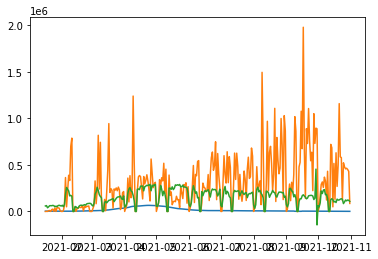

In [ ]:
import matplotlib.pyplot as plt
plt.plot(final['date'].values,final['Daily'].values) # blue
plt.plot(final['date'].values,final['Total Doses Administered'].values) # orange
plt.plot(final['date'].values,final['Total Tested'].values) # green

In [ ]:
# maharashtra, gujarat, kerela, andhra, odisha,wb, punjab, delhi

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm

In [ ]:
train = final[final['date']<='2021-09-30']
test = final[final['date']>'2021-09-30']
print(train.shape)
print(test.shape)

(257, 18)
(31, 18)


In [ ]:
final.iloc[:-1,:].shape

(287, 18)

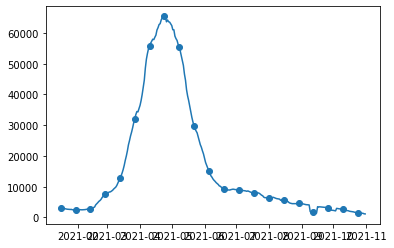

In [ ]:
plt.plot(final['date'].values,final['Daily'].values)
plt.scatter(final['date'].iloc[::14].values,final['Daily'].iloc[::14].values)

In [ ]:
train['Daily'].values

In [ ]:
def window_predictions(model, window=7):
  global final
  mob_preds = []
  mob_rmse = []
  vac_preds = []
  vac_rmse = []
  test_preds = []
  test_rmse = []
  vac_test_preds = []
  vac_test_rmse = []
  for i in range(window,288-window,window):
    temp_train = final.iloc[i-window:i,:]
    temp_test = final.iloc[i:i+window,:]
    temp_mob_model = model()
    temp_mob_model.fit(temp_train[mobility].values,temp_train['Daily'].values.astype('float16'))
    temp_mob_preds = temp_mob_model.predict(temp_test[mobility].values)
    mob_preds.extend(temp_mob_preds)
    mob_rmse.append(mean_squared_error(temp_test['Daily'].values,temp_mob_preds)**0.5)

    temp_vac_model = model()
    temp_vac_model.fit(temp_train[mobility+vaccination].values,temp_train['Daily'].values.astype('float16'))
    temp_vac_preds = temp_vac_model.predict(temp_test[mobility+vaccination].values)
    vac_preds.extend(temp_vac_preds)
    vac_rmse.append(mean_squared_error(temp_test['Daily'].values,temp_vac_preds)**0.5)

    temp_test_model = model()
    temp_test_model.fit(temp_train[mobility+tests].values,temp_train['Daily'].values.astype('float16'))
    temp_test_preds = temp_test_model.predict(temp_test[mobility+tests].values)
    test_preds.extend(temp_test_preds)
    test_rmse.append(mean_squared_error(temp_test['Daily'].values,temp_test_preds)**0.5)

    temp_vac_test_model = model()
    temp_vac_test_model.fit(temp_train[mobility+tests+vaccination].values,temp_train['Daily'].values.astype('float16'))
    temp_vac_test_preds = temp_vac_test_model.predict(temp_test[mobility+tests+vaccination].values)
    vac_test_preds.extend(temp_vac_test_preds)
    vac_test_rmse.append(mean_squared_error(temp_test['Daily'].values,temp_vac_test_preds)**0.5)
  return mob_preds,mob_rmse,vac_preds,vac_rmse,test_preds,test_rmse,vac_test_preds,vac_test_rmse

In [ ]:
mob_preds,mob_rmse,vac_preds,vac_rmse,test_preds,test_rmse,vac_test_preds,vac_test_rmse = window_predictions(LogisticRegression, 14)
plt.plot(final['date'].values,final['Daily'].values)
plt.scatter(final['date'].iloc[::14].values,final['Daily'].iloc[::14].values)
# plt.plot(final['date'].iloc[14:-8].values,mob_preds, color = 'c')
# plt.plot(final['date'].iloc[14:-8].values,vac_preds, color = 'm')
# plt.plot(final['date'].iloc[14:-8].values,test_preds, color = 'y')
# plt.plot(final['date'].iloc[14:-8].values,vac_test_preds, color = 'k')
l = [mob_preds,mob_rmse,vac_preds,vac_rmse,test_preds,test_rmse,vac_test_preds,vac_test_rmse]
c = 'cmyk'
for k in l[::2]:
  for i in range(14,266,14):
    plt.plot(final['date'].iloc[i:i+14].values,k[i:i+14], color = c[k//2])
# print(len(mob_preds))
# print(final['date'].iloc[14:-8].shape)

In [ ]:
log = LinearRegression().fit(train[mobility].values,train['Daily'].values)
print('Linear Regression predictions rmse (mobility)',mean_squared_error(test['Daily'].values,log.predict(test[mobility].values))**0.5)

log = LinearRegression().fit(train[mobility+vaccination+tests].values,train['Daily'].values)
print('Linear Regression predictions rmse (mobility + vaccinations)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+vaccination+tests].values))**0.5)

log = LinearRegression().fit(train[mobility+tests].values,train['Daily'].values)
print('Linear Regression predictions rmse (mobility + tests)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+tests].values))**0.5)

log = LinearRegression().fit(train[mobility+vaccination].values,train['Daily'].values)
print('Linear Regression predictions rmse (mobility + vaccinations + tests)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+vaccination].values))**0.5)

Linear Regression predictions rmse (mobility) 6350.934810505457
Linear Regression predictions rmse (mobility + vaccinations) 7426.588788988882
Linear Regression predictions rmse (mobility + tests) 8258.570376436272
Linear Regression predictions rmse (mobility + vaccinations + tests) 7735.010297458954


In [ ]:
log = LogisticRegression().fit(train[mobility].values,train['Daily'].values.astype('float16'))
print('Logistic Regression predictions rmse (mobility)',mean_squared_error(test['Daily'].values,log.predict(test[mobility].values))**0.5)

log = LogisticRegression().fit(train[mobility+vaccination+tests].values,train['Daily'].values.astype('float16'))
print('Logistic Regression predictions rmse (mobility + vaccinations)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+vaccination+tests].values))**0.5)

log = LogisticRegression().fit(train[mobility+tests].values,train['Daily'].values.astype('float16'))
print('Logistic Regression predictions rmse (mobility + tests)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+tests].values))**0.5)

log = LogisticRegression().fit(train[mobility+vaccination].values,train['Daily'].values.astype('float16'))
print('Logistic Regression predictions rmse (mobility + vaccinations + tests)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+vaccination].values))**0.5)

Logistic Regression predictions rmse (mobility) 1383.7379243145383
Logistic Regression predictions rmse (mobility + vaccinations) 1324.2591469752426
Logistic Regression predictions rmse (mobility + tests) 1383.7379243145383
Logistic Regression predictions rmse (mobility + vaccinations + tests) 3370.273287864261


In [ ]:
log = RandomForestRegressor().fit(train[mobility].values,train['Daily'].values.astype('float16'))
print('Random Forest Regression predictions rmse (mobility)',mean_squared_error(test['Daily'].values,log.predict(test[mobility].values))**0.5)

log = RandomForestRegressor().fit(train[mobility+vaccination+tests].values,train['Daily'].values.astype('float16'))
print('Random Forest Regression predictions rmse (mobility + vaccinations)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+vaccination+tests].values))**0.5)

log = RandomForestRegressor().fit(train[mobility+tests].values,train['Daily'].values.astype('float16'))
print('Random Forest Regression predictions rmse (mobility + tests)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+tests].values))**0.5)

log = RandomForestRegressor().fit(train[mobility+vaccination].values,train['Daily'].values.astype('float16'))
print('Random Forest Regression predictions rmse (mobility + vaccinations + tests)',mean_squared_error(test['Daily'].values,log.predict(test[mobility+vaccination].values))**0.5)

Random Forest Regression predictions rmse (mobility) 1765.4519749964952
Random Forest Regression predictions rmse (mobility + vaccinations) 2227.7719819720282
Random Forest Regression predictions rmse (mobility + tests) 1583.892033014168
Random Forest Regression predictions rmse (mobility + vaccinations + tests) 2414.8245154143633


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
train[mobility].shape[1]

5

In [ ]:
from pandas import *
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [ ]:
values = series_to_supervised(train[mobility]).values
values = values.reshape(values.shape[0]//8,8,values.shape[1])
values.shape

(32, 8, 10)

In [ ]:
model.fit(values,train['Daily'].iloc[:-1].values.reshape(32))